In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Data/realData/CombinedData.csv")

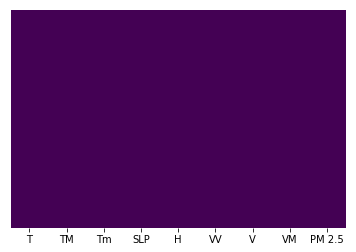

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [4]:
df=df.dropna()

In [25]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree = DecisionTreeRegressor(criterion="mse")

In [51]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
print("Coefficient of determination R^2 on train set: {}".format(tree.score(X_train, y_train)))

Coefficient of determination R^2 on train set: 1.0


In [52]:
print("Coefficient of determination R^2 <-- on test set: {}".format(tree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3610296836408915


In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,X,y,cv=5)

In [54]:
score.mean()

0.15815484880744604

In [38]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [16]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [17]:
# independant features
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [20]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [56]:
prediction = tree.predict(X_test)

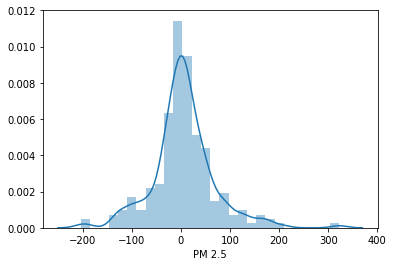

In [59]:
sns.distplot(prediction-y_test)

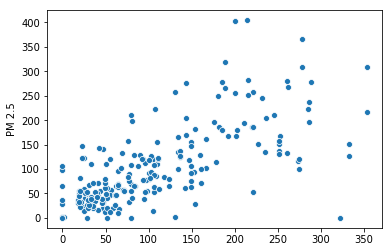

In [60]:
sns.scatterplot(prediction,y_test)

In [62]:
params={
"splitter"  : ["best","random"] ,
"max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf": [0.1,0.2,0.3,0.4],
"max_features" : ["auto","log2","sqrt",None ],
"max_leaf_nodes": [None,10,20,30,40,50,60,70]
    
}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
gs = GridSearchCV(tree,params,scoring="neg_mean_squared_error",n_jobs=-1,cv=10,verbose=3)

In [65]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [67]:
from datetime import datetime

start_time = timer() # timing starts from this point for "start_time" variable
gs.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 2968 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 6552 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 11160 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 16792 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 23448 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 31128 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 39832 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 49560 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 60312 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 72088 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 84888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 98712 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 2 minutes and 13.0 seconds.


In [68]:
gs.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [69]:
gs.best_score_

-3182.203746250058

In [70]:
pred = gs.predict(X_test)

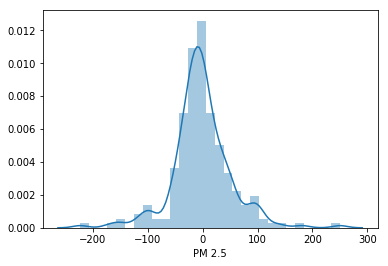

In [71]:
sns.distplot(y_test-pred)

In [74]:
from sklearn import metrics

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 37.09139105352228
MSE: 2938.8182422220557
RMSE: 54.2108683035243


In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.85428082191782
MSE: 4171.29652357623
RMSE: 64.58557519737847


In [77]:
import pickle
# open a file, where you ant to store the data
file = open('decision_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(gs, file)